<a href="https://colab.research.google.com/github/ProgramasParaFisicaComputacional/CreacionYLecturaDeArchivos/blob/main/Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#http://opendata.cern.ch/record/5201
#particles = pd.read_csv('https://cernbox.cern.ch/index.php/s/Ak6DnRo9QhV315Y/download')
#particles = pd.read_csv('http://opendata.cern.ch/record/5201/files/Dimuon_DoubleMu.csv')
particles = pd.read_csv('http://opendata.cern.ch/record/5206/files/Ymumu.csv')
particles.head()



,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1
1,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,-1,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1
2,165617,75167029,G,9.7583,2.3903,-3.7824,8.6715,4.4744,1.4156,-1.0072,-1,G,13.5684,-3.3975,5.1910,12.0665,6.2039,1.4187,2.1503,1
3,165617,75281957,G,9.6365,1.6516,-5.4313,7.7862,5.6769,1.1213,-1.2756,1,G,7.0263,-1.6449,4.4418,5.1887,4.7366,0.9473,1.9255,-1
4,165617,75393376,G,6.0112,3.3614,2.8883,4.0598,4.4318,0.8208,0.7098,-1,G,7.7557,-5.0416,-3.0126,5.0642,5.8731,0.7806,-2.6030,1


# Crear archivos CSV

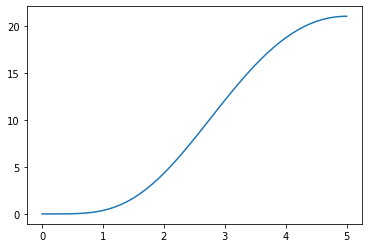

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math

#función que recibe un vector como argumento (x)
def fx(x):
    #note que se usa numpy porque se está operando sobre vectores y me regresa un vecor. 
    return ((x**5)*np.exp(-x))

#función que recibe un escalar/numero como argumento (x)
def fxUnNumero(x):
  if x>=0: 
    #note que se usa math porque se está operando sobre un único número y me regresa un solo número 
    return ((x**5)*math.exp(-x))
  else: 
    return 0

#función que recibe un vector como parámetro (x), realiza una operación sobre cada número del vector 
#y escribe el número y el resultado en un archivo. 
def fxVectorEscribir(x):
  fxvector = []
  
  #abro/creo un archivo en donde se van a guardar los valore. 
  valoresdelafuncion = open("/content/drive/MyDrive/WoRK/BUAP2021/FisicaComputacional/valoresdelafuncion.csv","w")
  #valoresdelafuncion = open("valoresdelafuncion.csv","w")
  
  #corro sobre cada valor del vector que se recibe como parámetro y escribo en el archivo
  for i in np.nditer(x):
    fxvector.append(fxUnNumero(i))

    linea = str(i)+", "+str(fxUnNumero(i))+"\n"
    valoresdelafuncion.write(linea)
  #cierro el archivo
  valoresdelafuncion.close()

  return fxvector


xintervalo = np.arange(0.0, 5.1, 0.1)
fxVectorEscribir(xintervalo)

plt.plot(xintervalo, fx(xintervalo))
plt.show()


In [30]:
%shell
!cat valoresdelafuncion.csv | grep 2.1

0.2, 0.0002619938409849542
0.4, 0.0068640772714049485
1.5, 1.694394653627139
1.6, 2.117038432527638
2.1, 5.001244210844318
3.2, 13.677526015622188
3.3000000000000003, 14.434372513323165
3.5, 15.860231974340845
3.7, 17.144271564475766


# Lectura del archivo

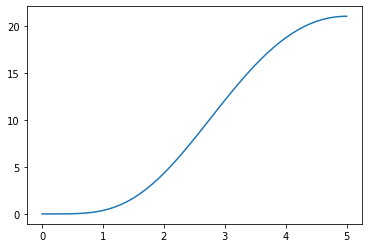

In [21]:
import matplotlib.pyplot as plt

#instrucción para abrir un archivo en modo lectura
archivo=open("valoresdelafuncion.csv", "r")
#se crea un vector de las lineas del archivo. Cada línea una entrada del vector, el tipo de dato es una cadena/string/str 
lineas = archivo.readlines()

#vectores vacíos para almacenar los datos
xvalues = []
fxvalues = []

for x in lineas:
  xvalues.append(float(x.split(',')[0]))
  fxvalues.append(float(x.split(',')[1]))

archivo.close()

plt.plot(xvalues, fxvalues)
plt.show()

# Leer datos y crear un archivo con datos transformados

In [29]:
import math

def myfunc(y):
  if y >= 0:
    return (y**5*math.exp(-y))
  else: 
    return 0

archivoentrada = open("/content/drive/MyDrive/WoRK/BUAP2021/FisicaComputacional/valoresdelafuncion.csv", "r")
archivosalida  = open("/content/drive/MyDrive/WoRK/BUAP2021/FisicaComputacional/valoresdesalida.csv", "w")

#leer el archivo por linea
for line in archivoentrada:
  par = line.split(", ")
  x = float(par[0])
  y = float(par[1])
  fy = myfunc(y)  #transformando el valor
  lineaparaescribir=str(x)+", "+str(fy)+"\n"
  archivosalida.write(lineaparaescribir)

archivoentrada.close()
archivosalida.close()

            

